# Урок 6. Градиентный бустинг. AdaBoost.

### 1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров. 

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [10]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees+1)
    plt.plot(list(range(1, n_trees+1)), train_err, label='train error')
    plt.plot(list(range(1, n_trees+1)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Ошибка алгоритма из 1 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2800.2227024543686
Ошибка алгоритма из 1 деревьев глубиной 3     с шагом 1 на тестовой выборке: 3970.030735303437
Ошибка алгоритма из 2 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2467.7832654606864
Ошибка алгоритма из 2 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4006.6595706163916
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2087.17295288895
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тестовой выборке: 3921.873019660821
Ошибка алгоритма из 4 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1754.3398099585818
Ошибка алгоритма из 4 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4059.764399393639
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1625.5658352671394
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4066.8656834830863
Ошибка алгоритма из 

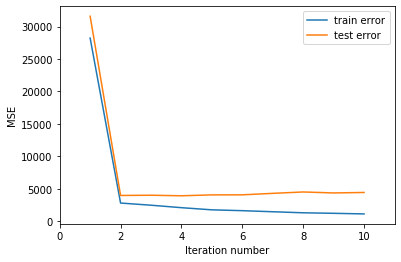

In [11]:
trees_max = 10
train_error = []
test_error = []
for n_trees in range(1, trees_max+1):
    coefs = [1] * n_trees
    max_depth = 3
    eta = 1
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    train_error.append(train_errors[-1])
    test_error.append(test_errors[-1])
    
get_error_plot(trees_max, train_error, test_error)   

Ошибка алгоритма из 3 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 3170.62467336104
Ошибка алгоритма из 3 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3694.8077876345183
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2777.406910897821
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3810.670194003019
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2087.17295288895
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тестовой выборке: 3921.873019660821
Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 1589.8001825109695
Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 1 на тестовой выборке: 3818.796954991744
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 706.2707952510889
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6079.705024785363
Ошибка алгоритма из 3 дер

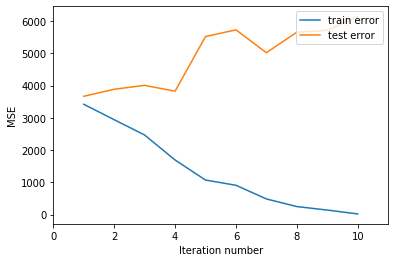

In [12]:
max_depth = 10
n_trees = 3
train_error = []
test_error = []
for max_depth in range(1, max_depth+1):
    coefs = [1] * n_trees
    eta = 1
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    train_error.append(train_errors[-1])
    test_error.append(test_errors[-1])
    
get_error_plot(trees_max, train_error, test_error)  

На графиках видно, что MSE резко падает при увеличении количества деревьев с 1 до 2, а дальше меняется мало. При увелицении же глубины деревьев модель сильно переобучается, особенно при увеличении глубины более 5.  

### 2*. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [13]:
def gb_fit_st(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, N):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        x_data = []
        y_labels = []
        
        for j in range(N):
            sample_index = random.randint(0, N-1)
            x_data.append(X_train[sample_index])
            y_labels.append(y_train[sample_index])
        
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(x_data, y_labels)
            
            train_errors.append(mean_squared_error(y_labels, gb_predict(x_data, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(x_data, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(x_data, bias(y_labels, target))
            
            train_errors.append(mean_squared_error(y_labels, gb_predict(x_data, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [14]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шагa
eta = 1

#Число записей подвыборки
N = int(X_train.shape[0]*0.5)

trees, train_errors, test_errors = gb_fit_st(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, N)

In [15]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 4517.6474673857
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 9040.13164853243


In [16]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

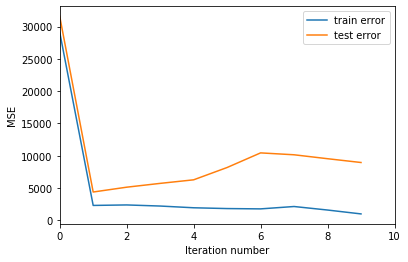

In [17]:
get_error_plot(n_trees, train_errors, test_errors)